# Ex1 - Getting and Knowing your Data



### Step 1. Import the necessary libraries

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 2. Import the dataset 

In [2]:
pd.read_csv("C:/Python_pandas/pandas_data.csv")

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Assign it to a variable called a.

In [3]:
a = pd.read_csv("C:/Python_pandas/pandas_data.csv")

### Step 4. See the first 10 entries

In [23]:
a.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [9]:
a.size      # Return the cartesian product of rows and column

23110

In [11]:
a.shape       #Total rows and column present in the data file

(4622, 5)

In [4]:
a.info()    # overall description of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [5]:
a.shape[1]     # this will show the total number of column

5

In [6]:
a.shape[0]   # this shows the total rows

4622

### Step 7. Print the name of all the columns.

In [7]:
a.columns[3]

'choice_description'

### Step 8. How is the dataset indexed?

In [8]:
a.index

RangeIndex(start=0, stop=4622, step=1)

In [9]:
a.describe()   #to show the descriptive stats of numerical values 

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### Step 9. Which was the most-ordered item? 

In [35]:
c = a.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending = False)
c.head(2)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...
Chicken Burrito,497303,591,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $...


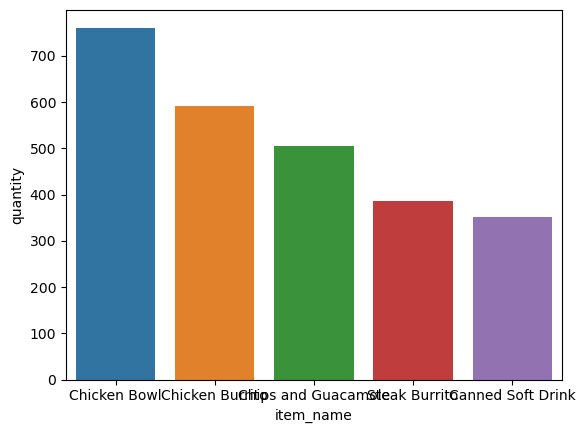

In [16]:
# c= a.groupby('item_name')['quantity'].sum().idxmax()

c= a.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)
c1 = c.reset_index()
sns.barplot(x ='item_name', y ='quantity', data= c1, hue='item_name')
plt.show()

In [4]:
# new method 

b = a.groupby('item_name').agg({"quantity": "sum"})
d = b.sort_values("quantity", ascending = False)
d.head(2)

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591


In [31]:
c = a.groupby('item_name')
c = c.count()
c = c.sort_values(['quantity'], ascending = False)
c.tail(2)

,order_id,quantity,choice_description,item_price
item_name,,,,
Carnitas Salad,1,1,1,1
Veggie Crispy Tacos,1,1,1,1


### Step 10. For the most-ordered item, how many items were ordered?

In [17]:
c=a.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)
c

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

### Step 11. What was the most ordered item in the choice_description column?

In [6]:
b = a.groupby('choice_description').agg({"quantity": "sum"})
d = b.sort_values("quantity", ascending = False)
d.head(2)

,quantity
choice_description,
[Diet Coke],159
[Coke],143


In [20]:
b = a.groupby('choice_description')['quantity'].sum()
b

quantity
1    541
2    191
3     84
4     52
5     46
Name: count, dtype: int64

In [ ]:
b1 = b.reset_index()

### Step 12. How many items were orderd in total?

In [11]:
c = a.agg({"quantity":"sum"})
c

quantity    4972
dtype: int64

In [12]:
a.quantity.sum()

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [5]:
print(a.item_price.dtype)

object


#### Step 13.b. Create a lambda function and change the type of item price

#### Step 13.c. Check the item price type

### Step 14. How much was the revenue for the period in the dataset?

In [6]:
a['total_revenue'] = a['quantity']*a['item_price']
Total_revenue = a['total_revenue'].sum()
print("Total revenue is :- ", Total_revenue)

Total revenue is :-  $2.39 $3.39 $3.39 $2.39 $16.98 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $17.98 $1.69 $17.50 $17.50 $

### Step 15. How many orders were made in the period?

In [10]:
b = a['order_id'].nunique()
b

1834

### Step 16. What is the average revenue amount per order?

### Step 17. How many different items are sold?

In [12]:
items_sold = a['item_name'].nunique()
items_sold

50